# ***1.Import Required Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# ***2.Load the Dataset***

In [2]:
file_path = "Google News.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df = df.dropna()

# ***3.Extract and Combine Relevant Text Features***

In [3]:
X_text = df[['title','publisher','date','keyword','country']].astype(str).agg(''.join, axis=1)
y = df['category']

# ***4.Convert Text Data into Vectors***

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X_text)

# ***5.Standardize the Features***

In [5]:
scaler = StandardScaler(with_mean=False)
X_tfidf_scaled = scaler.fit_transform(X_tfidf)

# ***6.Splitting Data , model training and Making predictions***

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_scaled, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# ***7.Evaluate the Model Performance and Confusion matrix analysis***

In [7]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# ***8.Visualizing the confusion matrix***

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


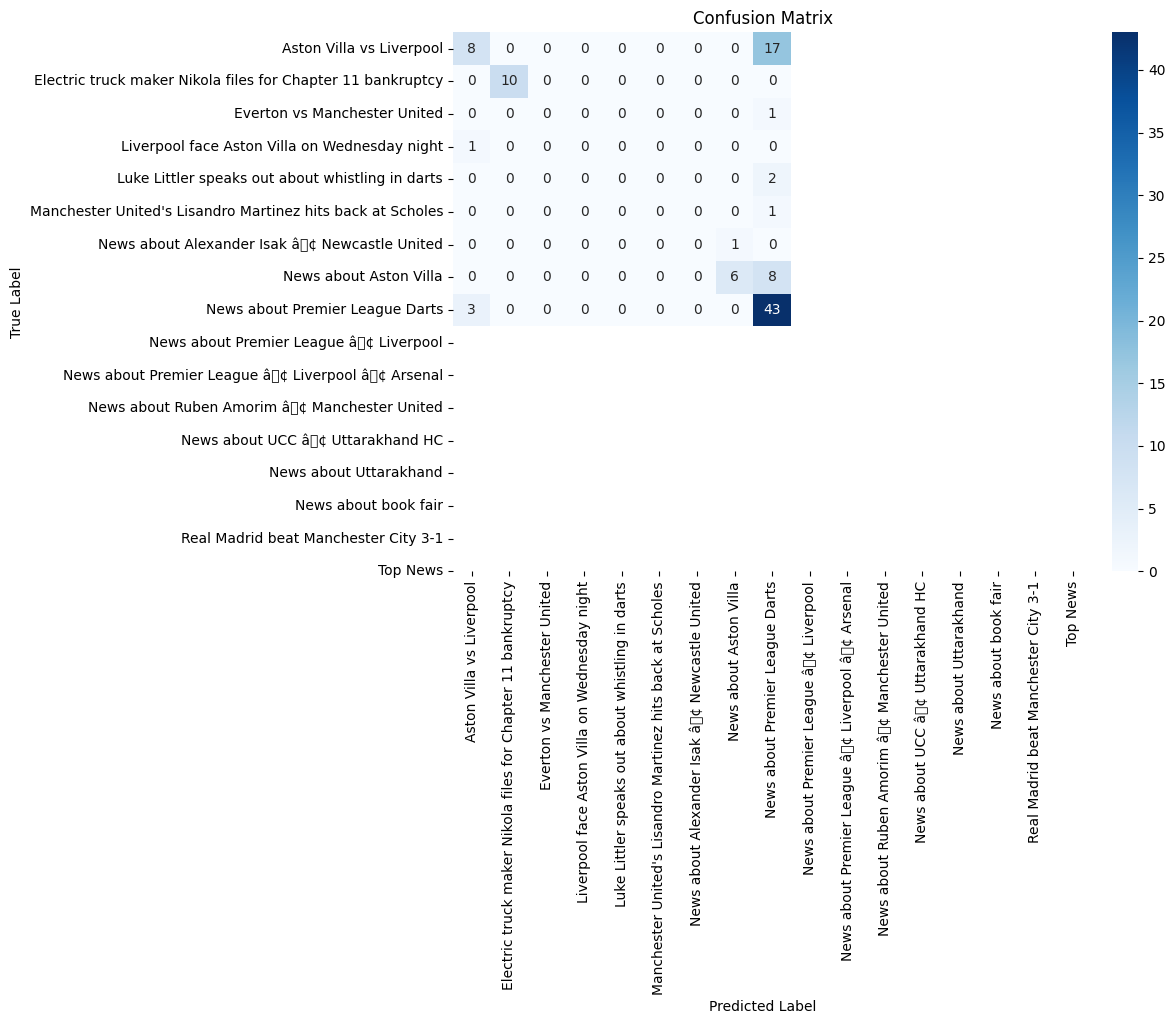

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title('Confusion Matrix')
plt.show()

# ***9.Final report generation***

In [9]:
print(f"Accuracy : {accuracy : .4f}")
print("Classification Report:")
print(report)

Accuracy :  0.6634
Classification Report:
                                                             precision    recall  f1-score   support

                                   Aston Villa vs Liverpool       0.67      0.32      0.43        25
Electric truck maker Nikola files for Chapter 11 bankruptcy       1.00      1.00      1.00        10
                               Everton vs Manchester United       1.00      0.00      0.00         1
              Liverpool face Aston Villa on Wednesday night       1.00      0.00      0.00         1
             News about Alexander Isak â¢ Newcastle United       1.00      0.00      0.00         2
        News about Premier League â¢ Liverpool â¢ Arsenal       1.00      0.00      0.00         1
                                     News about Uttarakhand       1.00      0.00      0.00         1
                                       News about book fair       0.86      0.43      0.57        14
                                                